## **Захарова Екатерина Дмитриевна** _вариант 25_

## **Лабораторная работа № 2**
### Текст задания:
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


In [1]:
import pandas as pd

In [2]:
glass_df = pd.read_csv("glass.csv")

In [3]:
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

1.  Id number: **Идентификационный номер**
2.  RI: **Индекс преломления**
3.  Na: **Концентрация Натрия**
4.  Mg: **Концентрация Магния**
5.  Al: **Концентрация Алюминия**
6.  Si: **Концентрация Кремния**
7.  К:  **Концентрация Калия**
8.  Ca: **Концентрация Кальция**
9.  Ba: **Концентрация Бария**
10. Fe: **Концентрация Железа**
11. Type of glass: **Тип стекла**
    - 1 - Для зданий (Изогнутые, обработанные)
    - 2 - Для зданий (Не изогнутые, обработанные)
    - 3 - Для транспортных средств (Изогнутые, обработанные)
    - 4 - Для транспортных средств (Не изогнутые, обработанные)
    - 5 - Для контейнеров
    - 6 - Для посуды
    - 7 - Для фар

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [4]:
print("Количество строк до удаления дубликатов: ", len(glass_df.index))
glass_df.drop_duplicates(keep = 'first', inplace = True)
print("Количество строк до удаления дубликатов: ", len(glass_df.index))

Количество строк до удаления дубликатов:  214
Количество строк до удаления дубликатов:  213


### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

In [5]:
import seaborn as sn

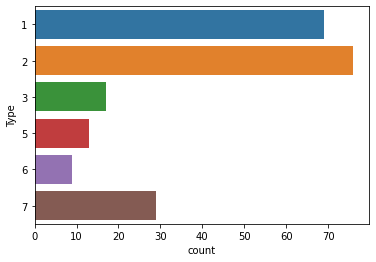

In [6]:
sn.countplot(data=glass_df, y='Type')

### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

Диаграмма до масштабирования:

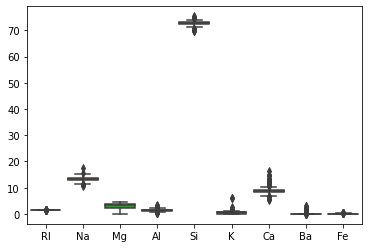

In [7]:
from sklearn import preprocessing

sn.boxplot(data=glass_df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']])

Выполнение стандартизации

In [8]:
scaler = preprocessing.MinMaxScaler()
glass_df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']] = scaler.fit_transform(glass_df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values.astype(float))

Диаграмма после масштабирования

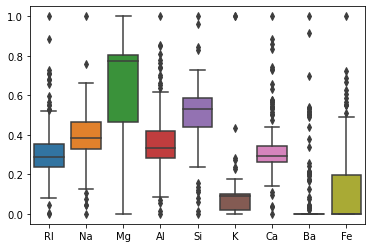

In [9]:
sn.boxplot(data=glass_df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']])

### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

Dummy - кодировка

In [10]:
def dummy_code(data, feature):
    for i in data[feature].unique():
        data[feature + ' = ' + str(i)] = (data[feature] == i).astype(float)

dummy_code(glass_df, 'Type')
glass_df.drop(['Type'], axis='columns', inplace=True)
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type = 1,Type = 2,Type = 3,Type = 5,Type = 6,Type = 7
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

In [11]:
glass_corr_df = glass_df.corr()
glass_corr_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type = 1,Type = 2,Type = 3,Type = 5,Type = 6,Type = 7
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,0.073456,0.066659,-0.037396,0.048865,-0.061932,-0.161582
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,-0.149383,-0.267279,0.011919,-0.180366,0.320340,0.505778
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,0.417816,0.166981,0.176735,-0.337272,-0.200322,-0.590119
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,-0.385551,-0.062212,-0.147806,0.301124,-0.035159,0.540242
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,-0.021175,-0.055022,-0.095489,-0.095392,0.150041,0.159787
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.049453,0.025350,-0.041761,0.379943,-0.160799,-0.105822
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,-0.081749,0.062620,-0.035432,0.209649,0.059443,-0.129132
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,-0.226950,-0.188206,-0.098971,0.006064,-0.074314,0.690159
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,0.003904,0.171820,-0.000660,0.009145,-0.123568,-0.178718
Type = 1,0.073456,-0.149383,0.417816,-0.385551,-0.021175,-0.049453,-0.081749,-0.226950,0.003904,1.000000,-0.515573,-0.203864,-0.176482,-0.145395,-0.274811


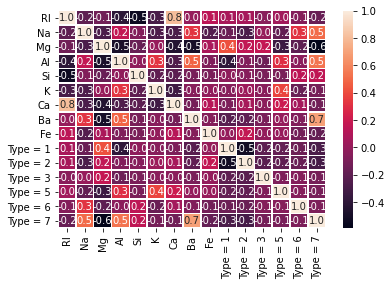

In [12]:
sn.heatmap(glass_corr_df, annot = True, fmt = '.1f', linewidths = .5)

### 7. Заполните пропущенные значения в данных;

In [13]:
glass_df.count()

RI          213
Na          213
Mg          213
Al          213
Si          213
K           213
Ca          213
Ba          213
Fe          213
Type = 1    213
Type = 2    213
Type = 3    213
Type = 5    213
Type = 6    213
Type = 7    213
dtype: int64

Пропущенные значения в данном наборе данных отсутствуют

### 8. Решите поставленную задачу классификации в соответствии с заданием.

#### Логический классификатор (бинарное решающее дерево).

In [20]:
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()
X, y = glass_df.drop('Type = 6', axis=1), glass_df['Type = 6']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
params = {'max_depth': list(range(1,12)), 'max_features': list(range(1,12))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit (X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('лучший тренировочный результат:', best_score, 
      '\t лучшее количество признаков:', best_features,
      '\t глубина:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score  = np.mean(y_test == dtc.predict(X_test))
print('лучший результат: ', best_score)

лучший тренировочный результат: 0.9933333333333334 	 лучшее количество признаков: 7 	 глубина: 7
лучший результат:  0.96875


#### Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов).

In [18]:

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier

iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

rnc = RadiusNeighborsClassifier()
rnc.get_params()
params = {'radius': [2, 3, 4],
          'weights': ['uniform', 'distance']}
rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)
y_score = rnc_grid.best_estimator_.fit(X_train, y_train).predict(X_test)
print('Лучший результат: {}'.format(rnc_grid.best_score_))

Лучший результат: 0.96


e:\python\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
e:\python\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### 9. Сравните кривые для классификаторов, указанных в задании
#### ROC - кривая

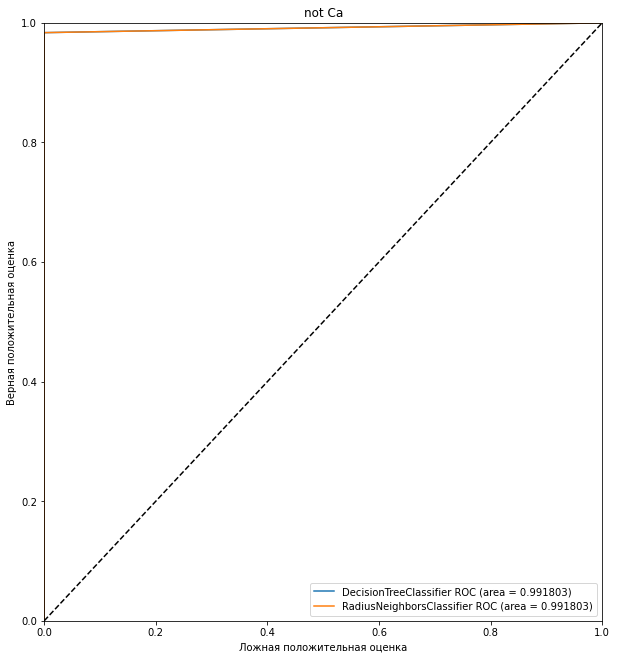

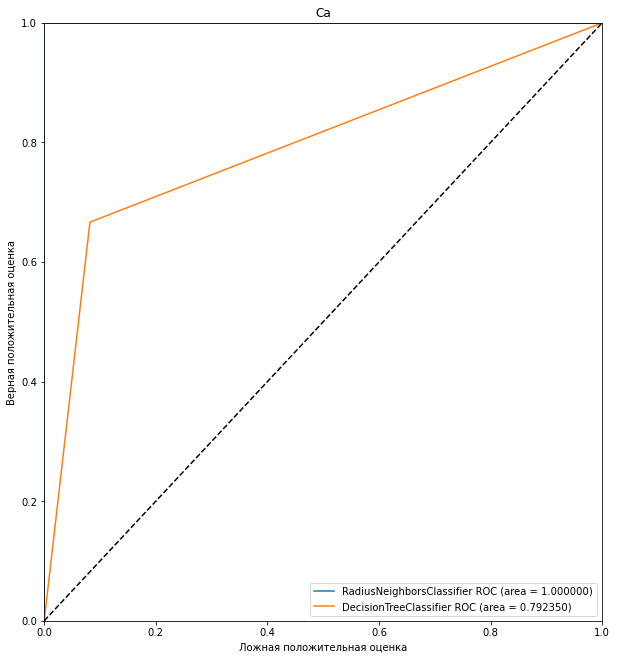

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10,11))

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc0 = dtc.fit(X_train, y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(y_test, probas_dtc0[:,0])
roc_auc  = auc (fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))

rnc = RadiusNeighborsClassifier()
probas_rnc0 = rnc.fit(X_train, y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(y_test, probas_dtc0[:,0])
roc_auc  = auc (fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Ложная положительная оценка')
plt.ylabel('Верная положительная оценка')
plt.legend(loc=4, fontsize='medium')
plt.title('not Ca')
plt.show()

plt.figure(figsize=(10,11))

rnc = RadiusNeighborsClassifier()
probas_rnc1 = rnc.fit(X_train, y_train).predict_proba (X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_rnc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc1 = dtc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_dtc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Ложная положительная оценка')
plt.ylabel('Верная положительная оценка')
plt.legend(loc=4, fontsize='medium')
plt.title('Ca')
plt.show()

#### PR - кривая

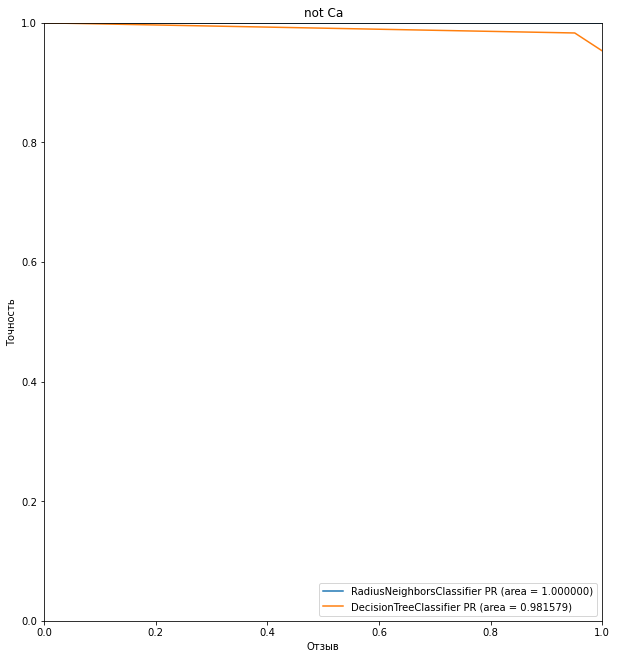

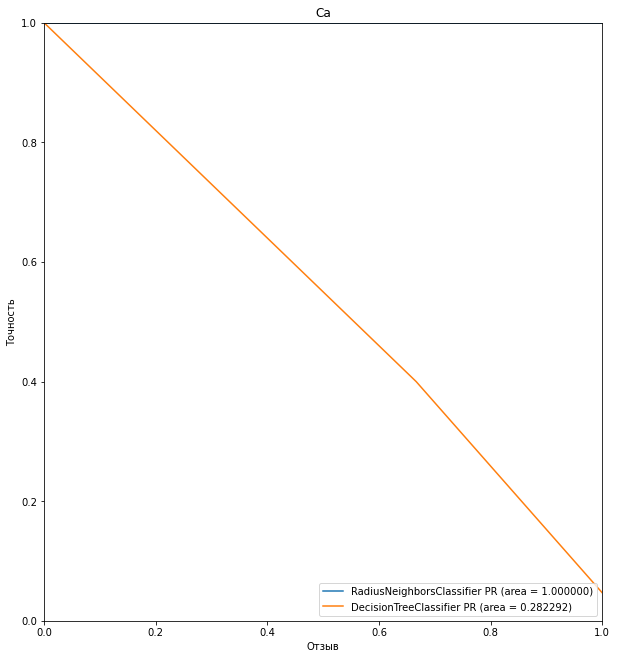

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

plt.figure(figsize=(10,11))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)

precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_rnc1[:,0])
aps_rnc1 = average_precision_score(y_test_invers,probas_rnc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_rnc1)) 

precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_dtc1[:,0])
aps_dtc1 = average_precision_score(y_test_invers,probas_dtc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 

plt.xlabel('Отзыв')
plt.ylabel('Точность')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('not Ca')
plt.show()


plt.figure(figsize=(10,11))

precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_rnc1[:,0])
aps_rnc1 = average_precision_score(y_test_invers,probas_rnc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_rnc1))

precision, recall, thresholds = precision_recall_curve(y_test, probas_dtc1[:,1])
aps_dtc1 = average_precision_score(y_test,probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 

plt.xlabel('Отзыв')
plt.ylabel('Точность')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('Ca')
plt.show()